In [560]:
# For analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# For visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:.2f}'.format

## Load Datasets 

In [561]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_comb = [df_train, df_test]

## Analyze by describing data

### Training Dataset

In [562]:
print(df_train.shape)
df_train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [563]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [564]:
#df_train.isnull().any()

In [565]:
# 숫자값을 가지고 있는 컬럼 기준
df_train.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [566]:
# 문자값을 가지고 있는 컬럼 기준
df_train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hickman, Mr. Stanley George",male,1601,B96 B98,S
freq,1,577,7,4,644


In [567]:
# 숫자값 & 문자값을 가지고 있는 모든 컬럼 기준
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Hickman, Mr. Stanley George",male,nan,nan,nan,1601,nan,B96 B98,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


### #1 Assumption

1. Necessary columns for analysis:
    * Pclass: catogorical data이고 어떤 등급의 승객이 생존할 확률이 높은지 파악 가능
    * Sex: categorical data이고 어떤 성별의 승객이 생존할 확률이 높은지 파악 가능
    * Age: numerical & continuous data이고 어떤 나이 범주의 승객이 생존할 확률이 높은지 파악 가능
    * SibSp & Parch: numerical data이고 가족수에 따라 어떤 승객이 생존할 확률이 높은지 파악 가능
    * Fare: numerical data이지만 Pclass와 관련이 있고 요금 범주에 따라 어떤 승객이 생존할 확률이 높은지 파악 가능
    * Embarked: categorical data이고 S에서 출발한 승객이 다수를 차지하고 있음
---
    * PassengerId: 단순히 내림차순의 숫자
    * Name: 891개의 데이터가 모두 개별적인 데이터
    * Ticket: 891개 중 681개 데이터가 개별적인 데이터, 동일한 데이터가 적음
    * Cabin: 누락된 데이터가 많음
2. Categorical columns:
    * Survived
    * Pclass
    * Sex
    * Embarked
3. Numerical columns:
    * Age
    * SibSp
    * Parch
    * Fare
4. Age, Cabin, 그리고 Embarked에 누락된 데이터 존재
5. 전체 승객 중 생존할 확률은 약 40% 

### Testing Dataset

In [568]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [569]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Explore

## Categorical Data 

### Pclass X Survived

In [570]:
df_train[['Pclass', 'Survived']].groupby(by='Pclass', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [571]:
pd.pivot_table(data=df_train, index='Pclass', values='Survived')

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [572]:
#sns.catplot(data=df_train, x='Pclass', y='Survived')

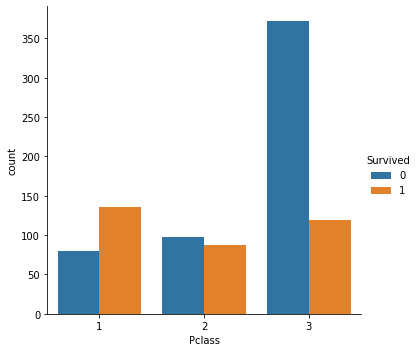

In [573]:
sns.catplot(data=df_train, x='Pclass', hue='Survived', kind='count')

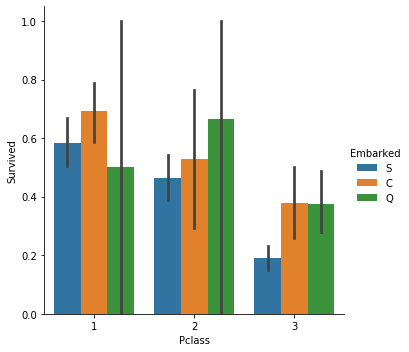

In [574]:
sns.catplot(data=df_train, x='Pclass', y='Survived', hue='Embarked', kind='bar')

/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


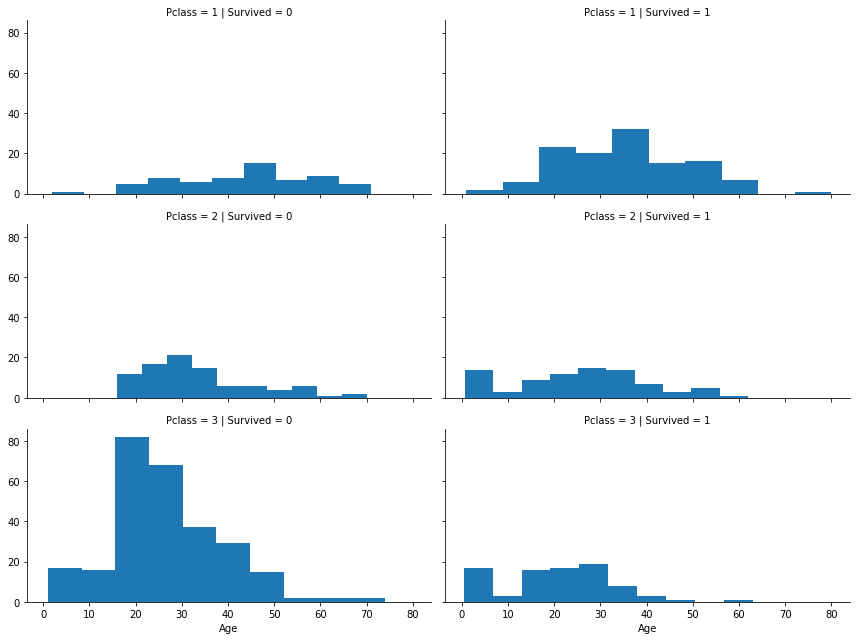

In [575]:
sns.FacetGrid(data=df_train, row='Pclass', col='Survived', size=3, aspect=2).map(plt.hist, 'Age')

### Insight

* 선실 등급이 높을수록 생존할 확률이 크다.
* 가장 낮은 등급인 3등칸에 가장 많은 승객이 탑승하고 있다.
* 1등급, 2등급 선실의 승객이 생존할 확률이 높다.


### Sex X Survived

In [576]:
df_train[['Sex', 'Survived']].groupby(by='Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.74
male,0.19


In [577]:
pd.pivot_table(data=df_train, index='Sex', values='Survived')

,Survived
Sex,
female,0.74
male,0.19


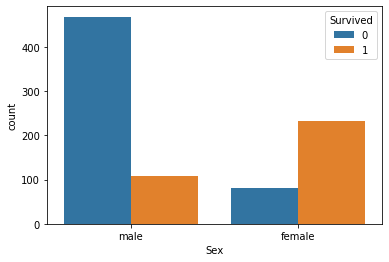

In [578]:
sns.countplot(data=df_train, x='Sex', hue='Survived')

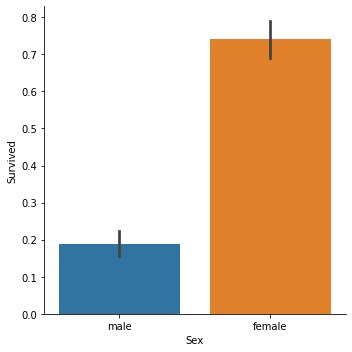

In [579]:
sns.catplot(data=df_train, x='Sex', y='Survived', kind='bar')

### 분석 결과

1. 남자보다 여자가 생존할 확률이 높다.
2. 여자보다 남자가 더 많이 탑승하고 있다.

### Embarked X Survived

In [580]:
df_train[['Embarked', 'Survived']].groupby(by='Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


In [581]:
pd.pivot_table(data=df_train, index='Embarked', values='Survived')

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


### SibSp X Survived 

In [582]:
df_train[['SibSp', 'Survived']].groupby(by='SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


In [583]:
pd.pivot_table(data=df_train, index='SibSp', values='Survived').sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


### Parch X Survived

In [584]:
df_train[['Parch', 'Survived']].groupby(by='Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


In [585]:
pd.pivot_table(data=df_train, index='Parch', values='Survived').sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


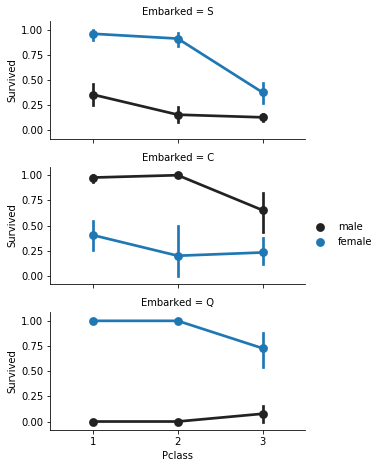

In [586]:
sns.FacetGrid(data=df_train, row='Embarked', size=2.2, aspect=2).\
map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallete='deep').\
add_legend()

## Numerical Data

### Age X Survived

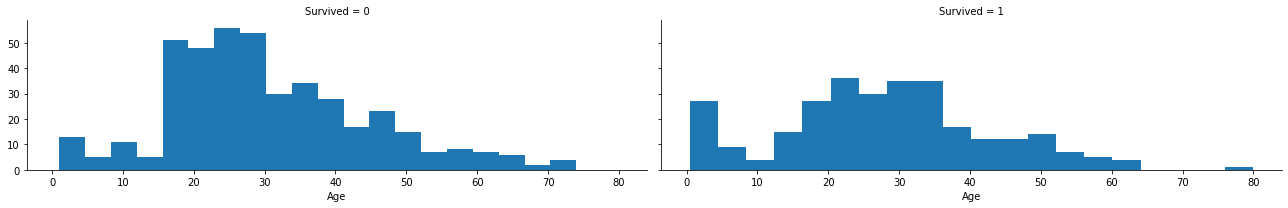

In [587]:
sns.FacetGrid(data=df_train, col='Survived', aspect=3).map(plt.hist, 'Age', bins=20)

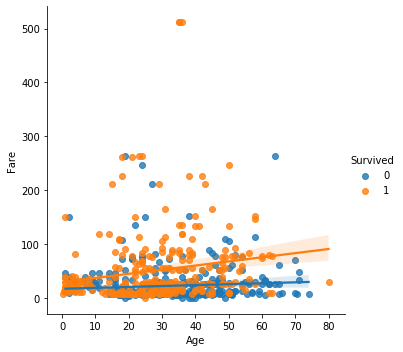

In [588]:
sns.lmplot(data=df_train, x='Age', y='Fare', hue='Survived')

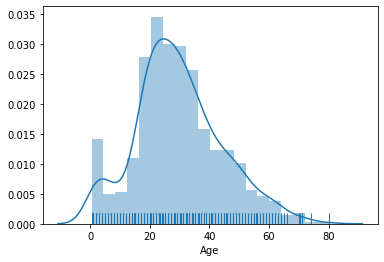

In [589]:
#sns.lmplot(data=df_train, x='Age', y='Fare', hue='Survived')
sns.distplot(a=df_train['Age'], kde=True, rug=True)

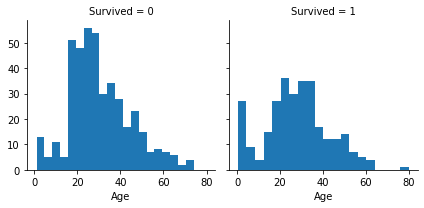

In [590]:
sns.FacetGrid(data=df_train, col='Survived').map(plt.hist, 'Age', bins=20)

/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


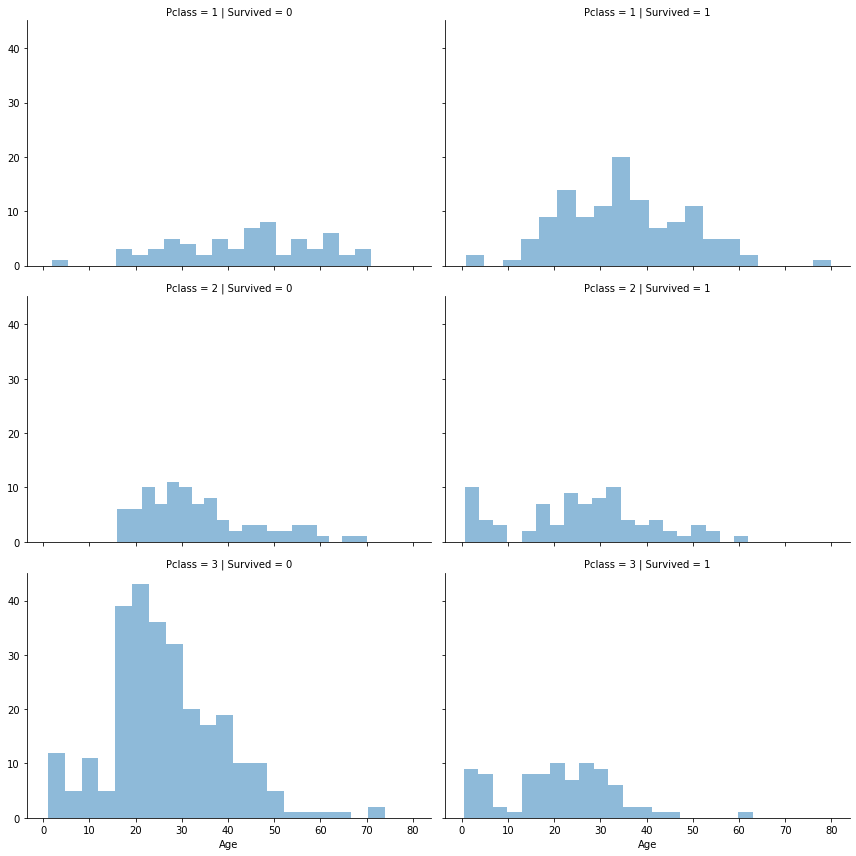

In [591]:
sns.FacetGrid(data=df_train, col='Survived', row='Pclass', size=4, aspect=1.5).map(plt.hist, 'Age', alpha=.5, bins=20)

### 분석 결과 

1. 나이가 어릴수록 생존할 확률이 높다.
2. 탑승권 가격이 높을수록 생존할 확률이 높다. 탑승권 가격은 선실 등급과 비례한다.
3. 탑승권 가격이 50이상인 경우 생존할 확률이 높다.

## Correlating Categorical and Numerical Data

### Survived X Embarked X Fare

/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


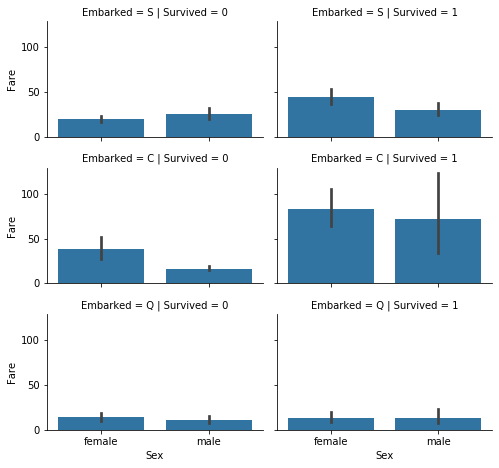

In [592]:
sns.FacetGrid(data=df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6).\
map(sns.barplot, 'Sex', 'Fare')

## Preprocessing 

### Drop unnecessary columns 

In [593]:
df_train.shape, df_comb[0].shape, df_test.shape, df_comb[1].shape

((891, 12), (891, 12), (418, 11), (418, 11))

In [594]:
df_train = df_train.drop(['Cabin', 'Ticket'], axis=1)
df_test = df_test.drop(['Cabin', 'Ticket'], axis=1)

df_comb=[df_train, df_test]

In [595]:
df_train.shape, df_comb[0].shape, df_test.shape, df_comb[1].shape

((891, 10), (891, 10), (418, 9), (418, 9))

In [596]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,8.46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.86,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.07,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.13,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.07,C


In [597]:
for dataset in df_comb:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [598]:
for dataset in df_comb:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.57
1,Miss,0.70
2,Mr,0.16
3,Mrs,0.79
4,Rare,0.35


In [599]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in df_comb:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S,1


In [600]:
df_train[df_train['Title'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [601]:
df_train = df_train.drop(['Name','PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

df_comb = [df_train, df_test]
df_train.shape, df_test.shape

((891, 9), (418, 9))

In [602]:
for dataset in df_comb:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.00,1,0,7.25,S,1
1,1,1,1,38.00,1,0,71.28,C,3
2,1,3,1,26.00,0,0,7.92,S,2
3,1,1,1,35.00,1,0,53.10,S,3
4,0,3,0,35.00,0,0,8.05,S,1


In [603]:
df_train['Sex'].dtype

dtype('int64')

In [604]:
df_train['Age'].isnull().sum()

177

/Users/jykang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


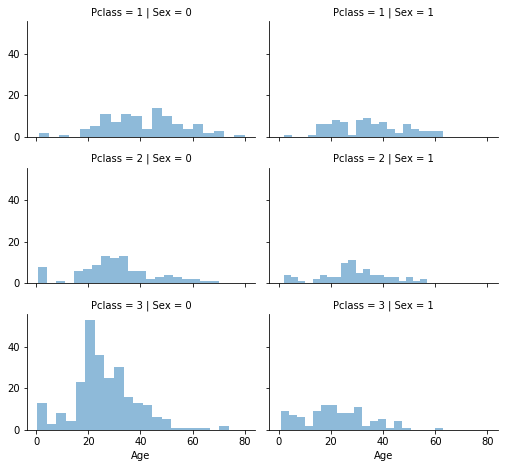

In [605]:
sns.FacetGrid(df_train, row='Pclass', col='Sex', size=2.2, aspect=1.6).\
map(plt.hist, 'Age', alpha=.5, bins=20).\
add_legend()

In [606]:
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [607]:
for dataset in df_comb:
    for i in range(0,2):
        for j in range(0,3):
            df_guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = df_guess.median()

            guess_age[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_age[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.25,S,1
1,1,1,1,38,1,0,71.28,C,3
2,1,3,1,26,0,0,7.92,S,2
3,1,1,1,35,1,0,53.10,S,3
4,0,3,0,35,0,0,8.05,S,1


In [608]:
df_train['AgeBand'] = pd.cut(df_train['Age'], bins=5)
#df_train['AgeBand'].unique()
df_train[['AgeBand', 'Survived']].groupby(by='AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.55
1,"(16.0, 32.0]",0.34
2,"(32.0, 48.0]",0.41
3,"(48.0, 64.0]",0.43
4,"(64.0, 80.0]",0.09


In [609]:
for dataset in df_comb:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.25,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.28,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.92,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.10,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.05,S,1,"(32.0, 48.0]"


In [610]:
df_train = df_train.drop(['AgeBand'], axis=1)
df_comb = [df_train, df_test]
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.25,S,1
1,1,1,1,2,1,0,71.28,C,3
2,1,3,1,1,0,0,7.92,S,2
3,1,1,1,2,1,0,53.10,S,3
4,0,3,0,2,0,0,8.05,S,1


In [611]:
for dataset in df_comb:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
df_train[['FamilySize', 'Survived']].groupby(by='FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.72
2,3,0.58
1,2,0.55
6,7,0.33
0,1,0.30
4,5,0.20
5,6,0.14
7,8,0.00
8,11,0.00


In [612]:
for dataset in df_comb:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
df_train[['IsAlone', 'Survived']].groupby(by='IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.51
1,1,0.30


In [613]:
df_train = df_train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
df_test = df_test.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

df_comb = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.25,S,1,0
1,1,1,1,2,71.28,C,3,0
2,1,3,1,1,7.92,S,2,1
3,1,1,1,2,53.10,S,3,0
4,0,3,0,2,8.05,S,1,1


In [614]:
for dataset in df_comb:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
    
df_train.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [615]:
frep_port = df_train.Embarked.dropna().mode()[0]
frep_port

'S'

In [616]:
for dataset in df_comb:
    dataset['Embarked'] = dataset['Embarked'].fillna(frep_port)
    
df_train[['Embarked', 'Survived']].groupby(by='Embarked', as_index=False).\
mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.55
1,Q,0.39
2,S,0.34


In [617]:
for dataset in df_comb:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.25,0,1,0,3
1,1,1,1,2,71.28,1,3,0,2
2,1,3,1,1,7.92,0,2,1,3
3,1,1,1,2,53.10,0,3,0,2
4,0,3,0,2,8.05,0,1,1,6


In [618]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.83,2,1,1,6
1,893,3,1,2,7.00,0,3,0,6
2,894,2,0,3,9.69,2,1,1,6
3,895,3,0,1,8.66,0,1,1,3
4,896,3,1,1,12.29,0,3,0,3


In [619]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(by='FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.20
1,"(7.91, 14.454]",0.30
2,"(14.454, 31.0]",0.45
3,"(31.0, 512.329]",0.58


In [620]:
for dataset in df_comb:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
df_train = df_train.drop(['FareBand'], axis=1)
df_comb = [df_train, df_test]

df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [621]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modeling & Predicting 

In [622]:
X_train = df_train.drop(['Survived'], axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop(['PassengerId'], axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [623]:
print(X_train.shape)
X_train.head()

(891, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [624]:
print(Y_train.shape)
Y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [625]:
print(X_test.shape)
X_test.head()

(418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


In [626]:
X_test[X_test['Title'].isnull() == True]

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass


In [627]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36